## Solutions: 
* How are things going in NY? 
* Come up with a plan to grow the market by 20% in two months.

## 0. Import all the toolboxes needed

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine_vector, haversine, Unit
import statistics as statis
from matplotlib.ticker import PercentFormatter
from scipy import stats

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

import warnings
warnings.filterwarnings('ignore')

import datetime
from datetime import timedelta


sns.set()

## 1. Import data & preliminary analysis

### 1.0 Import data

In [134]:
j_1 = pd.read_csv('data/jump_8.csv', index_col=False)

In [135]:
j_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 26 columns):
delivery_id                             4646 non-null int64
customer_id                             4646 non-null int64
jumpman_id                              4646 non-null int64
vehicle_type                            4646 non-null object
pickup_place                            4646 non-null object
place_category                          4646 non-null object
item_quantity                           4646 non-null float64
item_category_name                      4646 non-null object
how_long_it_took_to_order               4646 non-null float64
pickup_lat                              4646 non-null float64
pickup_lon                              4646 non-null float64
dropoff_lat                             4646 non-null float64
dropoff_lon                             4646 non-null float64
when_the_delivery_started               4646 non-null object
when_the_Jumpman_arrived_at_pickup  

### 1.1 Preliminary analysis for basic market information

* Time frame
* Distance
* Customer
* Jumpman
* Orders
* Trend

#### 1.1.0 Time frame

In [4]:
print('When the first delivery start:', j_1.when_the_delivery_started.min())
print('When the last delivery complete:', j_1.when_the_Jumpman_arrived_at_dropoff.max())

When the first delivery start: 2014-10-01 00:26:31.924774
When the last delivery complete: 2014-10-30 23:29:44.866438


#### 1.1.1 Distance

Longest delivery distance: 7.776752024881808 miles
Mean of distance:  1.1295756927937883 miles
Min of distance:  0.014749382263972587
Max of distance:  7.776752024881808


Delivery distance distribution
 (-0.001, 1.0]    0.580069
(1.0, 2.0]       0.288420
(2.0, 3.0]       0.076410
(3.0, 4.0]       0.032501
(4.0, 5.0]       0.014206
(5.0, 6.0]       0.005596
(6.0, 7.0]       0.001722
Name: distance, dtype: float64


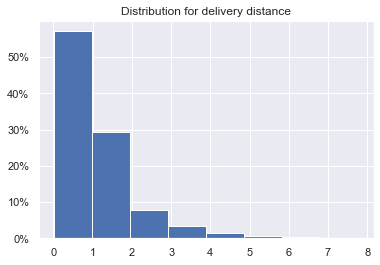

In [5]:
# print('Shortest delivery distance:', j_1.distance.min(),'miles')
print('Longest delivery distance:', j_1.distance.max(),'miles')
print('Mean of','distance: ',j_1['distance'].mean(), 'miles');
print('Min of','distance: ',j_1['distance'].min());
print('Max of','distance: ',j_1['distance'].max());
print('\n')
print("Delivery distance distribution\n", j_1['distance'].value_counts(100, bins=range(0, 8)))

plt.title("Distribution for delivery distance")
plt.hist(j_1['distance'], weights=np.ones(len(j_1['distance'])) / len(j_1['distance']), bins=8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


#### 1.1.2 Customers

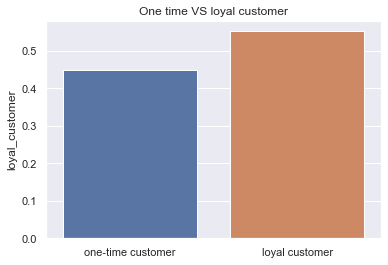

In [149]:
plt.title("One time VS loyal customer")
sns.barplot(j_1.loyal_customer.value_counts(100).index, j_1.loyal_customer.value_counts(100));
plt.xticks([0, 1], ['one-time customer', 'loyal customer']);

Top loyal customer is: ModeResult(mode=array([369272]), count=array([23])) with [23] orders in a month
Mean of times customer order:  2.622040464916057
Mode of times customer order:  1
Median of times customer order:  2.0


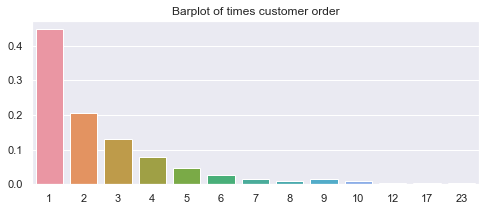

Average time it takes for a customer to order: 7.800043047783039
Mode of time it takes for a customer to order: 8.0 ,due to filled in
Median of times customer order:  8.0


In [6]:
print('Top loyal customer is:',stats.mode(j_1['customer_id']),'with',j_1.customer_id.value_counts().head(1).values,'orders in a month')

print('Mean of','times customer order: ',(j_1['customer_order_freq'].mean()));
print('Mode of','times customer order: ',statis.mode(j_1['customer_order_freq']));
print('Median of','times customer order: ',statis.median(j_1['customer_order_freq']));


j_1['customer_order_freq'].value_counts(100, bins=range(0, 25, 5))

fig = plt.gcf()
fig.set_size_inches(8, 3)
plt.title('Barplot of ' + 'times customer order')
sns.barplot(j_1['customer_order_freq'].value_counts().index, j_1['customer_order_freq'].value_counts(100).values);
plt.show()


print('Average time it takes for a customer to order:',(j_1.how_long_it_took_to_order.sum())/(len(j_1.how_long_it_took_to_order)))
print('Mode of','time it takes for a customer to order:',statis.mode(j_1['how_long_it_took_to_order']),',due to filled in');
print('Median of','times customer order: ',statis.median(j_1['how_long_it_took_to_order']));





Average waiting time for customer since the delivery starts: 44.90938441670254 minutes


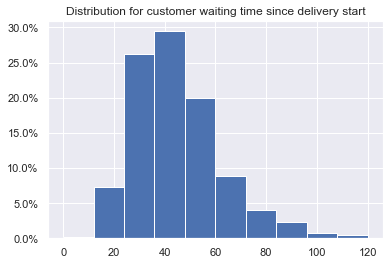

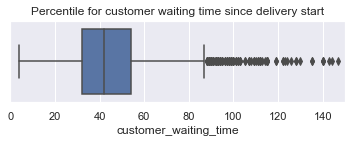

In [7]:
print('Average waiting time for customer since the delivery starts:', j_1.customer_waiting_time.mean(), 'minutes')

plt.title("Distribution for customer waiting time since delivery start")
plt.hist(j_1['customer_waiting_time'], weights=np.ones(len(j_1['customer_waiting_time'])) / len(j_1['customer_waiting_time']), bins=np.linspace(0,120,11))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

plt.title("Percentile for customer waiting time since delivery start")
sns.boxplot(j_1.customer_waiting_time);
fig = plt.gcf()
fig.set_size_inches(6, 1.5)
plt.xlim(0, 150)
plt.show()

#### 1.1.3 Jumpmen

In [8]:
print('Top worker is:',statis.mode(j_1['jumpman_id']),'with',j_1.jumpman_id.value_counts().head(1).values,'orders delivered in a month')

print('Mean of','times of delivery: ',(j_1.groupby('jumpman_id').count().iloc[:, 1].sum() / len(j_1.groupby('jumpman_id').count().iloc[:, 1])
     ))
print('Mode of','times of delivery: ',statis.mode(j_1.groupby('jumpman_id').count().iloc[:, 1]))


Top worker is: 99219 with [59] orders delivered in a month
Mean of times of delivery:  8.23758865248227
Mode of times of delivery:  1


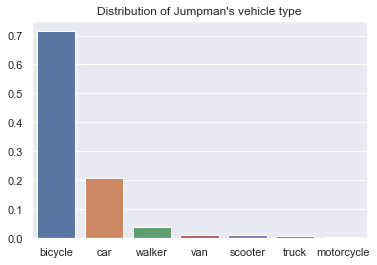



Average Jumpman delivery speed: 4.712656048213517 miles/hr


After printing out the Jumpman speed distribution plot, we can see that though there exist different kind of vehicle the speed is quite centered, after plotting out the boxplot for differnt of vehicle, it shows that there is no significant between different type of vehicle


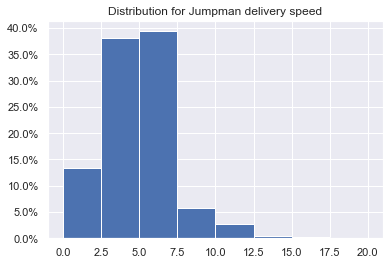

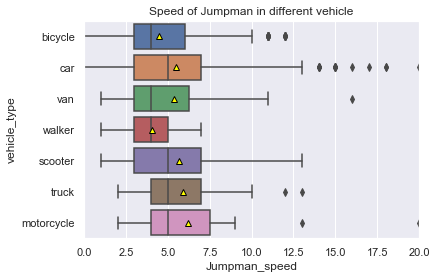

In [9]:
plt.title("Distribution of Jumpman's vehicle type")
sns.barplot(j_1['vehicle_type'].value_counts().index, j_1['vehicle_type'].value_counts().values/len( j_1['vehicle_type']));
plt.show()
print('\n')

print('Average Jumpman delivery speed:', j_1.Jumpman_speed.mean(), 'miles/hr')
print('\n')
print('After printing out the Jumpman speed distribution plot, we can see that though there exist different kind of vehicle the speed is quite centered, after plotting out the boxplot for differnt of vehicle, it shows that there is no significant between different type of vehicle')

plt.title("Distribution for Jumpman delivery speed")
plt.hist(j_1['Jumpman_speed'], weights=np.ones(len(j_1['Jumpman_speed'])) / len(j_1['Jumpman_speed']), bins = np.linspace(0,20,9))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

plt.title('Speed of Jumpman in different vehicle');
speed_plot_vechicle_type = sns.boxplot(j_1.Jumpman_speed, j_1.vehicle_type, orient='h', showmeans=True, meanprops={"markerfacecolor":"yellow", "markeredgecolor":"black"});
speed_plot_vechicle_type.set(xlim=(0, 20));
plt.show()

In [10]:
times_1 = j_1[['time_for_Jumpman_to_arrive_at_pickup','Jumpman_waiting_time','time_for_delivery']]

times_1_melt = pd.melt(times_1)

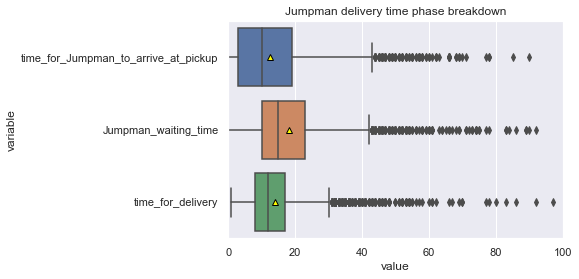

In [11]:
plt.title('Jumpman delivery time phase breakdown')
sns.boxplot(times_1_melt.value, times_1_melt.variable, showmeans=True, meanprops={"markerfacecolor":"yellow", "markeredgecolor":"black"});
plt.xlim(0, 100);



Average waiting time for Jumpman to arrive at pickup: 12.582651743435212 minutes


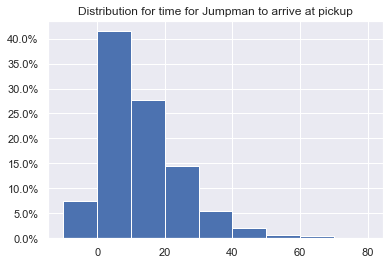

In [12]:
print('Average waiting time for Jumpman to arrive at pickup:', j_1.time_for_Jumpman_to_arrive_at_pickup.mean(), 'minutes')

plt.title("Distribution for time for Jumpman to arrive at pickup")
plt.hist(j_1['time_for_Jumpman_to_arrive_at_pickup'], weights=np.ones(len(j_1['time_for_Jumpman_to_arrive_at_pickup'])) / len(j_1['time_for_Jumpman_to_arrive_at_pickup']), bins = np.linspace(-10,80,10))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


Average waiting time for Jumpman at pickup: 18.15518725785622 minutes


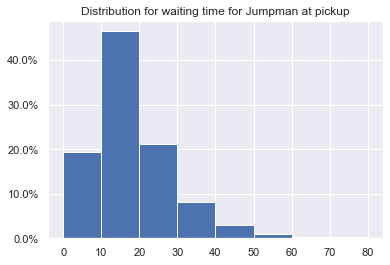

In [13]:
print('Average waiting time for Jumpman at pickup:', j_1.Jumpman_waiting_time.mean(), 'minutes')

plt.title("Distribution for waiting time for Jumpman at pickup")
plt.hist(j_1['Jumpman_waiting_time'], weights=np.ones(len(j_1['Jumpman_waiting_time'])) / len(j_1['Jumpman_waiting_time']), bins = np.linspace(0,80,9))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Average Jumpman delivery time: 14.132156693930263 minutes


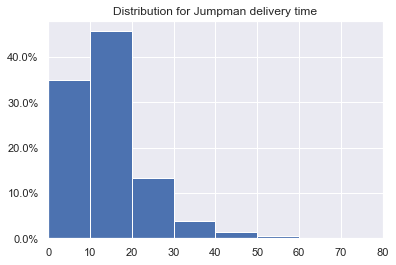

In [14]:
print('Average Jumpman delivery time:', j_1.time_for_delivery.mean(), 'minutes')

plt.title("Distribution for Jumpman delivery time")
plt.hist(j_1['time_for_delivery'], weights=np.ones(len(j_1['time_for_delivery'])) / len(j_1['time_for_delivery']), bins=np.linspace(0,80,9))
plt.xlim(0, 80)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### 1.1.4 Orders

In [15]:
# delivery_id
# pickup_place                            
# place_category                         
# item_quantity                          
# item_category_name                      
# extra_food_prep_time

After filtering out suspicious data and orders with 1+ item, there are: 4646 orders in the first month
Orders in the firsrt month order from 828 differnt places
Average quantity of items in a single order 1.2122255703831253


Excluding the filled in others category, these are the Top 10 places


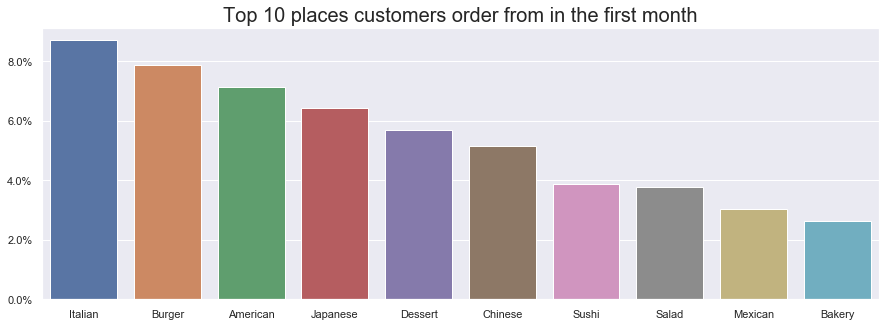



Excluding the filled in others category, these are the Top 10 items, "Naked ball" is an Italian dish from The Meatball Shop.


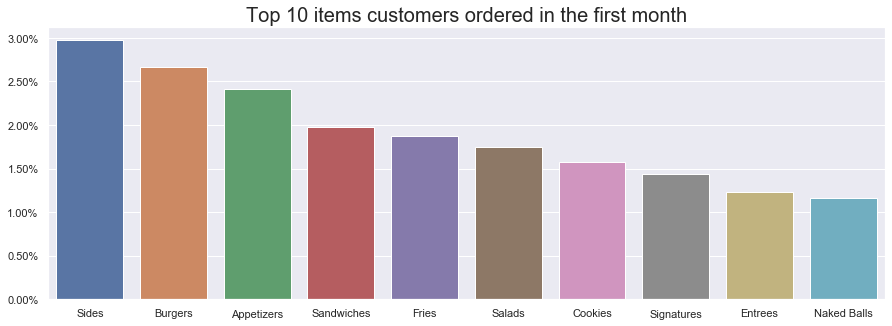

In [16]:
print('After filtering out suspicious data and orders with 1+ item, there are:',len(j_1.delivery_id), 'orders in the first month')

print('Orders in the firsrt month order from', len(j_1.pickup_place.unique()),'differnt places')
print('Average quantity of items in a single order', j_1.item_quantity.mean())

print("\n")
print('Excluding the filled in others category, these are the Top 10 places')
plt.title('Top 10 places customers order from in the first month', size=20)
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(j_1.place_category.value_counts()[1:11].index, j_1.place_category.value_counts(100)[1:11].values);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print("\n")
print('Excluding the filled in others category, these are the Top 10 items, "Naked ball" is an Italian dish from The Meatball Shop.')
plt.title('Top 10 items customers ordered in the first month', size=20)
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(j_1.item_category_name.value_counts()[1:11].index, j_1.item_category_name.value_counts(100)[1:11].values);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


Average extra time for food preparation: 30.791433491175205 minutes


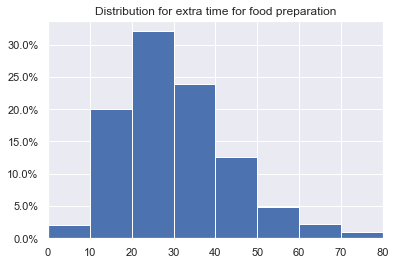

In [17]:
print('Average extra time for food preparation:', j_1.extra_food_prep_time.mean(), 'minutes')

plt.title("Distribution for extra time for food preparation")
plt.hist(j_1['extra_food_prep_time'], weights=np.ones(len(j_1['extra_food_prep_time'])) / len(j_1['extra_food_prep_time']), bins=np.linspace(0,80,9))
plt.xlim(0, 80)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### 1.1.5 Trend

In [18]:
j_1.when_the_delivery_started= pd.to_datetime(j_1.when_the_delivery_started) 
j_1.when_the_Jumpman_arrived_at_dropoff= pd.to_datetime(j_1.when_the_Jumpman_arrived_at_dropoff) 

In [19]:
datetime.datetime(2014, 10, 1).weekday()

2

#### Hourly
By printing out hourly trend analysis, we can see that there exist two peaks for the amount of order. The smaller one peak around 12:00PM EST and the bigger one peak around 19:00 EST on a daily basis. 

Out of curiosity, I am speculating that since average customer waiting time since delivery is 45 minutes meal will arrived around 20:00 EST. By combining two trends, the arrival of food did show a approx 45 minutes delay.

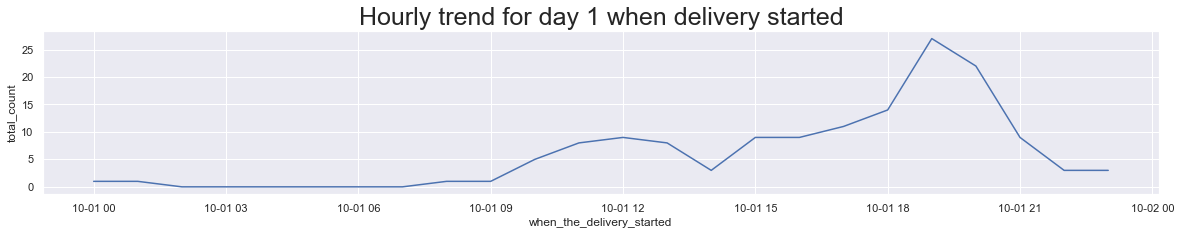

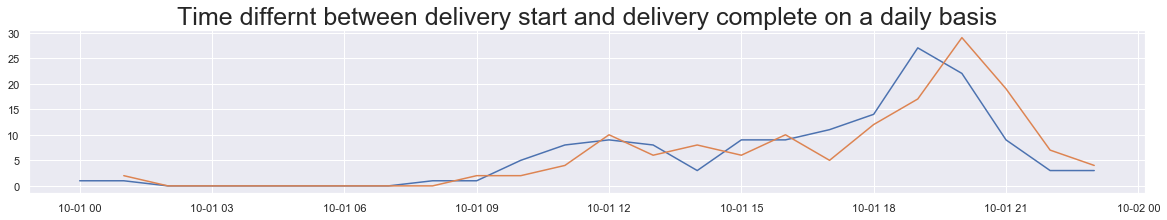

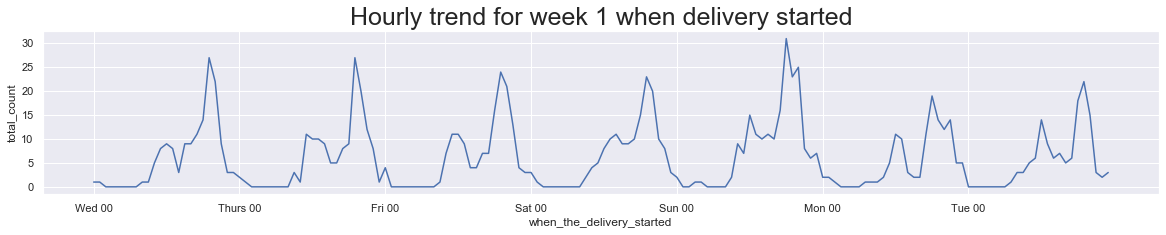

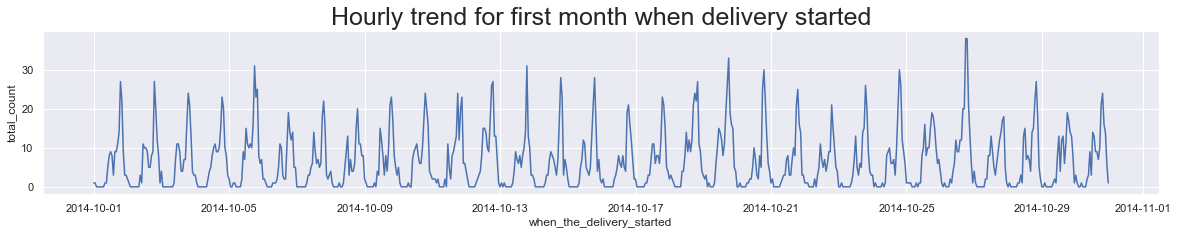

In [20]:
hour_count = j_1[['when_the_delivery_started']]
hourly_count = hour_count.sort_values(by='when_the_delivery_started').set_index('when_the_delivery_started')
hourly_count['total_count'] = 1
when_the_delivery_started_hourly_count = hourly_count.resample('h').count()

fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Hourly trend for day 1 when delivery started", size=25)
sns.lineplot(when_the_delivery_started_hourly_count.index[0:24], when_the_delivery_started_hourly_count.total_count[0:24]);
plt.show()

hour_count_1 = j_1[['when_the_Jumpman_arrived_at_dropoff']]
hourly_count_1 = hour_count_1.sort_values(by='when_the_Jumpman_arrived_at_dropoff').set_index('when_the_Jumpman_arrived_at_dropoff')
hourly_count_1['total_count'] = 1
when_the_Jumpman_arrived_at_dropoff_hourly_count = hourly_count_1.resample('h').count()

plt.title('Time differnt between delivery start and delivery complete on a daily basis', size=25)
hourly_melt = pd.concat([when_the_delivery_started_hourly_count, when_the_Jumpman_arrived_at_dropoff_hourly_count], axis=1)
fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.plot(hourly_melt.index[0:24], hourly_melt.total_count[0:24]);
plt.show()


fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Hourly trend for week 1 when delivery started", size=25)
sns.lineplot(when_the_delivery_started_hourly_count.index[0:168], when_the_delivery_started_hourly_count.total_count[0:168]);
plt.xticks(['2014-10-01','2014-10-02','2014-10-03','2014-10-04','2014-10-05','2014-10-06','2014-10-07'],['Wed 00', 'Thurs 00', 'Fri 00', 'Sat 00', 'Sun 00', 'Mon 00', 'Tue 00'])
plt.show()

fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Hourly trend for first month when delivery started", size=25)
sns.lineplot(when_the_delivery_started_hourly_count.index, when_the_delivery_started_hourly_count.total_count);
plt.show()


#### Daily
On a daily basis, the trend shows that the peak happend on Sunday. This is an interesting finding, people use Jumpman23 more often on a Sunday.

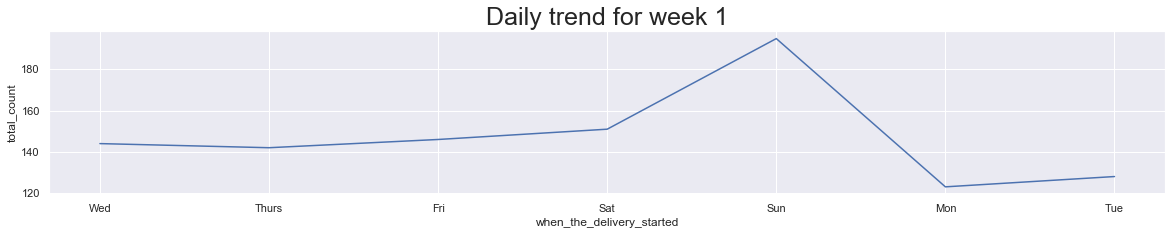

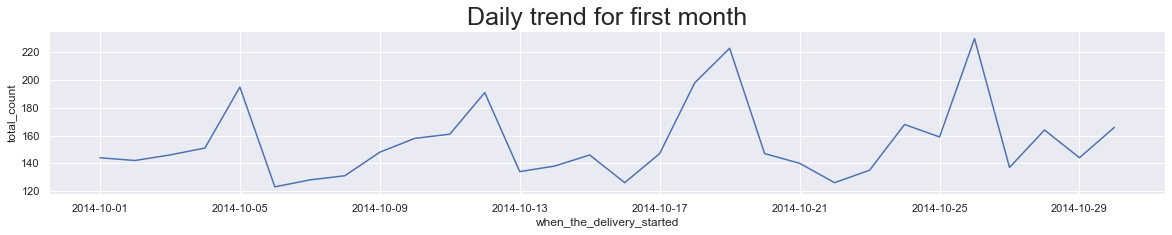

In [21]:
day_count = j_1[['when_the_delivery_started']]
daily_count = day_count.sort_values(by='when_the_delivery_started').set_index('when_the_delivery_started')
daily_count['total_count'] = 1
when_the_delivery_started_daily_count = daily_count.resample('D').count()

fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Daily trend for week 1", size=25)
sns.lineplot(when_the_delivery_started_daily_count.index[0:7], when_the_delivery_started_daily_count.total_count[0:7]);
plt.xticks(['2014-10-01','2014-10-02','2014-10-03','2014-10-04','2014-10-05','2014-10-06','2014-10-07'],['Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue'])
plt.show()

fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Daily trend for first month", size=25)
sns.lineplot(when_the_delivery_started_daily_count.index, when_the_delivery_started_daily_count.total_count);
plt.show()


#### Weekly
From the weekly trend, we can see that the amount of orders shows an increase for the first 3 weeks, then followed by a very slighly decline.

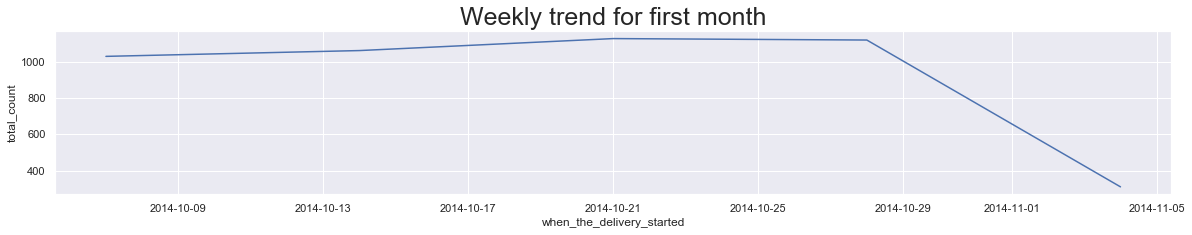

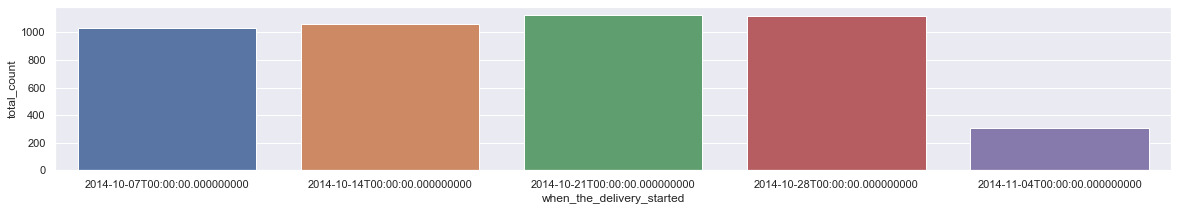

,total_count
when_the_delivery_started,
2014-10-07,1029
2014-10-14,1061
2014-10-21,1127
2014-10-28,1119
2014-11-04,310


In [22]:
week_count = j_1[['when_the_delivery_started']]
weekly_count = week_count.sort_values(by='when_the_delivery_started').set_index('when_the_delivery_started')
weekly_count['total_count'] = 1
when_the_delivery_started_weekly_count = weekly_count.resample('W-TUE').count()

fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Weekly trend for first month", size=25)
sns.lineplot(when_the_delivery_started_weekly_count.index, when_the_delivery_started_weekly_count.total_count);
plt.show()

fig = plt.gcf()
fig.set_size_inches(20, 3)
sns.barplot(when_the_delivery_started_weekly_count.index, when_the_delivery_started_weekly_count.total_count);
plt.show()

when_the_delivery_started_weekly_count

#### 1.1.6 Breakfast, lunch, dinner, midnight-food

In [23]:
def meal(x):
    if ((x > -1) and (x <= 5)) or ((x > 21) and (x <= 24)):
        return 'midnight-food'
    elif (x > 5) and (x <= 10 ):
        return 'breakfast'
    elif (x > 10) and (x <= 16):
        return'lunch'
    elif (x > 16) and (x <= 21) :
        return 'dinner'

In [24]:
j_1['meal'] = 0

In [25]:
j_1['meal'] = j_1.when_the_delivery_started.dt.hour.apply(meal)

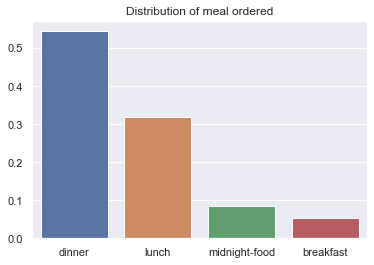

In [26]:
plt.title('Distribution of meal ordered')
sns.barplot(j_1.meal.value_counts(100).index, j_1.meal.value_counts(100).values);

### 2. Further Analysis & how to expand market?

From research https://www.usfoods.com/our-services/business-trends/2019-food-delivery-statistics.html & https://aytm.com/blog/food-delivery-survey/, we can see that the no.1 things people care about for food delivery services is -- speed.

According to survey results from USfood, only 25% of customers will accept a delivery which takes longer than an hour. And on average people can only accept delivery that takes no more than 40 minutes.

For Jumpmen, according to USfood survey, one of their biggest complaint is that food is not ready when they arrived at the pick_up place. 

Let's now dig more into the time performance of Jumpman23


#### 2.0 Time performance for Jumpman23 & market expansion:

Though the data is collected in 2014, 5 years before the survey is conducted, the time performance of Jumpman23 needs to be improved. The 40 minutes in the survey included food preparation time, in our case, original food preparation time is not included. (Since there are around 500 cases in which the Jumpman arrived at pickup before the delivery starts, this only indicates that the when_the_delivery_started variable in our data is the estimated time delivery start not the time when customer execute their order.)

From the analysis, our data do not show a significant waiting time difference between loyal and one-time customers. However, this might be due to that the data is collected within a month, we need a longer period to know if the delivery time has affected customer loyalty. 

To expand the market, what we can do is shorten the time for delivery. From the printout and boxplot below, we can see that there is, on average, an extra 30 minutes of food preparation time. To shorten this time, we can first encourage the cooperate restaurant to prepare a menu for delivery, which takes a shorter time to prepare. Secondly, we can promote the pre-order function for customers, this will give the restaurant more time to sort through their orders. By shortening the food preparation time, we can have fewer complaints from Jumpman and customers, it the best of both worlds. There will be more Jumpman who are willing to join our network since the waiting time at pickup is significantly reduced, which can also help reduce delivery time. As a result, more customers can be attracted by Jumpman23's speedy delivery then we can achieve the goal for market expansion.

RADIUS(DELIVERY MENU -- SHORTER TIME, NORMAL MENU LONGER)

time_for_Jumpman_to_arrive_at_pickup    12.582652
Jumpman_waiting_time                    18.155187
time_for_delivery                       14.132157
extra_food_prep_time                    30.791433
customer_waiting_time                   44.909384
dtype: float64

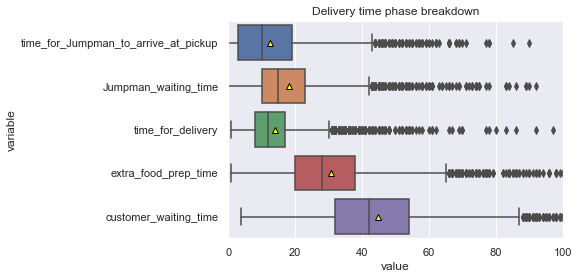

In [27]:
times_2 = j_1[['time_for_Jumpman_to_arrive_at_pickup','Jumpman_waiting_time','time_for_delivery','extra_food_prep_time','customer_waiting_time']]
times_2_melt = pd.melt(times_2)
plt.title('Delivery time phase breakdown')
sns.boxplot(times_2_melt.value, times_2_melt.variable, showmeans=True, meanprops={"markerfacecolor":"yellow", "markeredgecolor":"black"});
plt.xlim(0, 100);

times_2.mean()

#### 2.0.1 Waiting time analysis for loyal customer and one time customer

In [28]:
loyal_c = j_1[j_1.loyal_customer == 1]
onetime_c = j_1[j_1.loyal_customer == 0]

In [29]:
def hypo_2sides(x, y):
    """H0: loyal customer waiting time is not less than one time customer waiting time
         H1: loyal customer waiting time < one time customer waiting time"""
    if (stats.mannwhitneyu(x, y, alternative='less')[1]) >= 0.05:
        return "P-value: " + str('{:f}'.format(stats.mannwhitneyu(x, y, alternative='less')[1])) + ", we cannot reject the null hypothesis"
    else:
        return "P-value: " + str('{:f}'.format(stats.mannwhitneyu(x, y, alternative='less')[1])) + ", we can reject the null hypothesis, and accept the alternative"

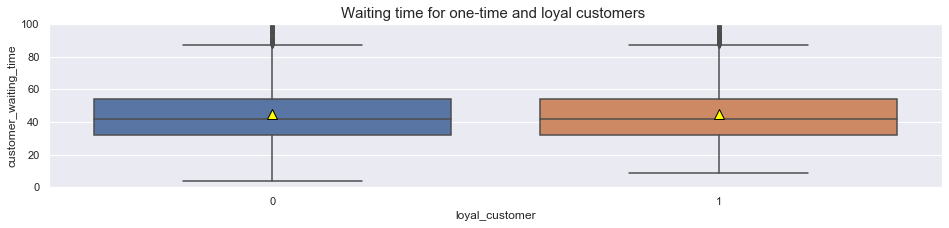

For loyal and one time customer, we can see from the normality test result, p_value < 0.05, we can than reject the hypothesis and conclude that our distribution for both sets of data are different from a normal distribution.


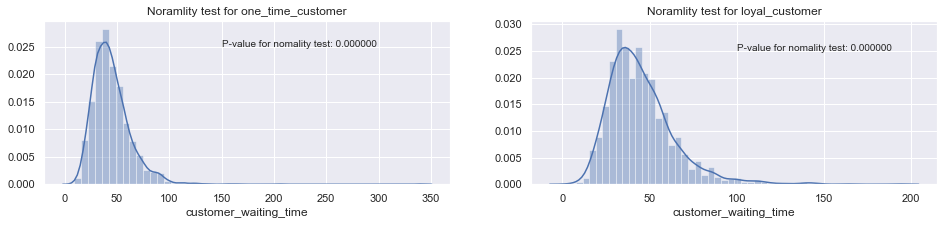

Performing Whitney_U_Mann test here with hypothesis:
H0: loyal_c.customer_waiting_time is not less onetime_c.customer_waiting_time
H1: loyal_c.customer_waiting_time < onetime_c.customer_waiting_time


P-value: 0.316331, we cannot reject the null hypothesis
That loyal_c.customer_waiting_time is not less onetime_c.customer_waiting_time


In [30]:
___ = sns.boxplot(j_1.loyal_customer, j_1.customer_waiting_time, orient='v', showmeans=True, meanprops={"markerfacecolor":"yellow", "markeredgecolor":"black", "markersize":10});
___.set(ylim=(0,100));
plt.title('Waiting time for one-time and loyal customers ', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(16, 3)
# sns.set_palette({'r':'r', "w":"w"})
plt.show()

print('For loyal and one time customer, we can see from the normality test result, p_value < 0.05, we can than reject the hypothesis and conclude that our distribution for both sets of data are different from a normal distribution.')



plt.subplot(1,2,1)
plt.title("Noramlity test for one_time_customer")
fig = plt.gcf()
fig.set_size_inches(16, 3)
sns.distplot(loyal_c.customer_waiting_time);
plt.text(150, 0.025, "P-value for nomality test: " + str('{:f}'.format(stats.normaltest(loyal_c.customer_waiting_time)[1])));

plt.subplot(1,2,2)
plt.title("Noramlity test for loyal_customer")
fig = plt.gcf()
fig.set_size_inches(16, 3)
sns.distplot(onetime_c.customer_waiting_time);
plt.text(100, 0.025, "P-value for nomality test: " + str('{:f}'.format(stats.normaltest(onetime_c.customer_waiting_time)[1])));

plt.show()


print('Performing Whitney_U_Mann test here with hypothesis:\nH0: loyal_c.customer_waiting_time is not less onetime_c.customer_waiting_time\nH1: loyal_c.customer_waiting_time < onetime_c.customer_waiting_time')
print('\n')
print(hypo_2sides(loyal_c.customer_waiting_time, onetime_c.customer_waiting_time))

print('That loyal_c.customer_waiting_time is not less onetime_c.customer_waiting_time')

Correlation between customer order freq and customer waiting time: 0.000859; P-value for correlation test: 0.953348
With a high p_value, we can conclude that from our data the correlation between customer order frequency and customer waiting time is not different from zero, which means there do not exist significant correlation between the two variables


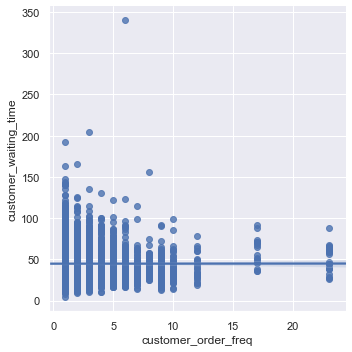

In [31]:
sns.lmplot(x='customer_order_freq', y='customer_waiting_time', data=j_1);

print("Correlation between customer order freq and customer waiting time: " + str('{:f}'.format(stats.pearsonr(j_1.customer_order_freq, j_1.customer_waiting_time)[0])) + "; P-value for correlation test: " + str('{:f}'.format(stats.pearsonr(j_1.customer_order_freq, j_1.customer_waiting_time)[1])));
print('With a high p_value, we can conclude that from our data the correlation between customer order frequency and customer waiting time is not different from zero, which means there do not exist significant correlation between the two variables')

#### 2.1 Trend Analysis and market expansion:
We can see from the hourly orders count plot below that there exists a significant peak around dinner time. What we can do to increase the market share is to increase the breakfast, lunch, and midnight-food market. For those who never order from Jumpman23 for breakfast, lunch, and midnight-food, we can offer a discount or promotion to motivate them. I speculate that the other factor for people to not execute a delivery for breakfast and lunch is the time uncertainty. To solve this, we can promote the pre-order function in the app in order to help to expand the breakfast and lunch market share.

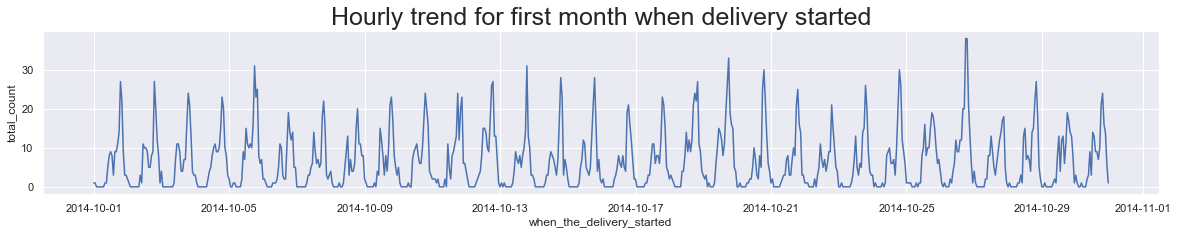

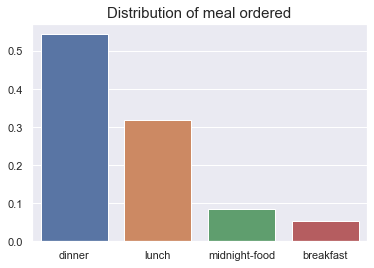

In [32]:
fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.title("Hourly trend for first month when delivery started", size=25)
sns.lineplot(when_the_delivery_started_hourly_count.index, when_the_delivery_started_hourly_count.total_count);
plt.show()

plt.title('Distribution of meal ordered', size=15)
sns.barplot(j_1.meal.value_counts(100).index, j_1.meal.value_counts(100).values);

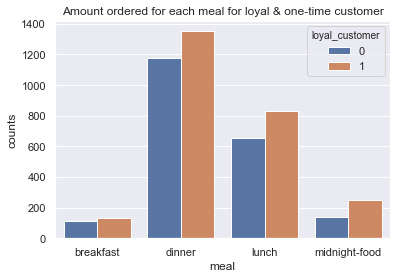

,meal,loyal_customer,counts
0,breakfast,0,110
1,breakfast,1,132
2,dinner,0,1178
3,dinner,1,1352
4,lunch,0,653
5,lunch,1,833
6,midnight-food,0,140
7,midnight-food,1,248


In [131]:
meal_ana = j_1.groupby(['meal','loyal_customer']).delivery_id.count().to_frame('counts').reset_index()


plt.title('Amount ordered for each meal for loyal & one-time customer')
sns.barplot(meal_ana.meal, meal_ana.counts, hue = meal_ana.loyal_customer);
plt.show()

meal_ana

In [132]:
j_1.to_csv('data/j_ana.csv', index=False)